In [94]:
import matplotlib as mpl
import matplotlib.pyplot as plt

# change the following to %matplotlib notebook for interactive plotting
%matplotlib notebook

import numpy as np
import pandas as pd
from pandas import DataFrame, Series  # for convenience
import xarray as xr

import pims
from pims import ND2_Reader

import sys
sys.path.append("C:/Users/rmcgorty/Documents/GitHub/trackpy")
import trackpy as tp

import pickle

In [177]:
with open(r"210624_Vimentin_m03_p06_A_TRAJECTORY_NEW.pkl", "rb") as input_file:
    tA = pickle.load(input_file)
with open(r"210624_Vimentin_m03_p06_A1_TRAJECTORY_NEW.pkl", "rb") as input_file:
    tA1 = pickle.load(input_file)
with open(r"210624_Vimentin_m03_p06_B_TRAJECTORY_NEW.pkl", "rb") as input_file:
    tB = pickle.load(input_file)

with open(r"210624_Vimentin_m03_p06_B1_TRAJECTORY_NEW.pkl", "rb") as input_file:
    tB1 = pickle.load(input_file)
with open(r"210624_Vimentin_m03_p06_B2_TRAJECTORY_NEW.pkl", "rb") as input_file:
    tB2 = pickle.load(input_file)

In [215]:
d = tp.compute_drift(tA)
tAd = tp.subtract_drift(tA.copy(), d)
d = tp.compute_drift(tA1)
tA1d = tp.subtract_drift(tA1.copy(), d)
d = tp.compute_drift(tB)
tBd = tp.subtract_drift(tB.copy(), d)

tAn = tp.filter_stubs(tA,  50)
tA1n = tp.filter_stubs(tA1,  50)
tBn = tp.filter_stubs(tB,  50)
tB1n = tp.filter_stubs(tB1,  50)
tB2n = tp.filter_stubs(tB2,  50)

In [216]:
imxA = tp.imsd(tAn, 0.13, 99.92, max_lagtime=1000, statistic='<x>')
imyA = tp.imsd(tAn, 0.13, 99.92, max_lagtime=1000, statistic='<y>')

imxA1 = tp.imsd(tA1n, 0.13, 99.92, max_lagtime=1000, statistic='<x>')
imyA1 = tp.imsd(tA1n, 0.13, 99.92, max_lagtime=1000, statistic='<y>')

imxB = tp.imsd(tBn, 0.13, 99.92, max_lagtime=1000, statistic='<x>')
imyB = tp.imsd(tBn, 0.13, 99.92, max_lagtime=1000, statistic='<y>')

imxB1 = tp.imsd(tB1n, 0.13, 99.92, max_lagtime=1000, statistic='<x>')
imyB1 = tp.imsd(tB1n, 0.13, 99.92, max_lagtime=1000, statistic='<y>')

imxB2 = tp.imsd(tB2n, 0.13, 99.92, max_lagtime=1000, statistic='<x>')
imyB2 = tp.imsd(tB2n, 0.13, 99.92, max_lagtime=1000, statistic='<y>')

<IPython.core.display.Javascript object>


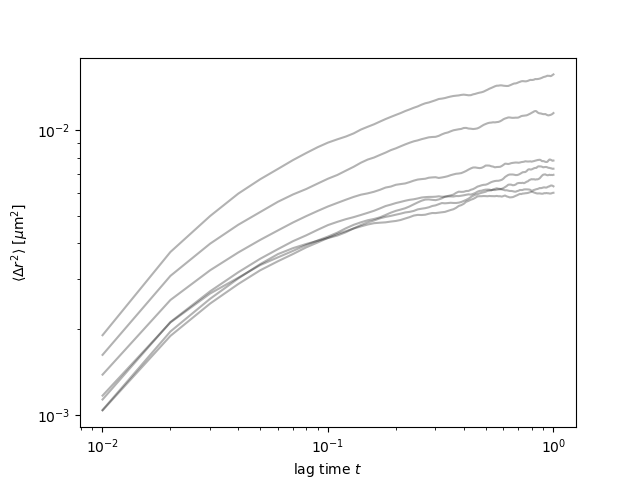

In [217]:
im = tp.imsd(tAn, 0.13, 99.92)
fig, ax = plt.subplots()
ax.plot(im.index, im, 'k-', alpha=0.3)  # black lines, semitransparent
ax.set(ylabel=r'$\langle \Delta r^2 \rangle$ [$\mu$m$^2$]',
       xlabel='lag time $t$')
ax.set_xscale('log')
ax.set_yscale('log')

In [3]:
usernm = 'rmcgorty'
fit_saved_dir = "C:/Users/%s/Dropbox/ManuscriptsInProgress/DDM of cytoskeleton - JoVE/Data/" % usernm
fit03_06_A = xr.open_dataset(fit_saved_dir+"ddm_fits/fit03_06_A.nc")
fit03_06_A1 = xr.open_dataset(fit_saved_dir+"ddm_fits/fit03_06_A1.nc")
fit03_06_B = xr.open_dataset(fit_saved_dir+"ddm_fits/fit03_06_B.nc")
fit03_06_B1 = xr.open_dataset(fit_saved_dir+"ddm_fits/fit03_06_B1.nc")
fit03_06_B2 = xr.open_dataset(fit_saved_dir+"ddm_fits/fit03_06_B2.nc")

In [209]:
imxB2

,0,1,2,3,4,5,6,10,12,13,...,116,117,118,121,122,125,128,134,136,137
lag time [s],,,,,,,,,,,,,,,,,,,,,
0.010008,0.000032,0.000002,0.000027,0.000039,0.000020,-0.000029,NaN,0.018317,-0.013027,NaN,...,-0.010470,-0.007549,0.060379,-0.058939,0.005322,0.039653,-0.016364,0.055583,0.007475,0.037102
0.020016,0.000047,-0.000004,0.000046,0.000078,0.000032,-0.000068,NaN,NaN,-0.022948,NaN,...,0.007146,-0.023886,0.120757,-0.002395,NaN,0.092895,NaN,NaN,NaN,-0.024645
0.030024,0.000064,-0.000014,0.000059,0.000109,0.000046,-0.000101,-0.044278,NaN,-0.040301,0.054657,...,-0.003324,-0.037872,NaN,-0.061335,NaN,0.118958,0.004047,NaN,0.104430,-0.087647
0.040032,0.000075,-0.000028,0.000085,0.000130,0.000060,-0.000141,NaN,NaN,-0.030493,NaN,...,NaN,-0.062452,NaN,NaN,NaN,NaN,-0.012317,NaN,0.111905,-0.049289
0.050040,0.000082,-0.000018,0.000105,0.000155,0.000079,-0.000182,NaN,NaN,-0.079871,NaN,...,0.003821,-0.083420,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9.967974,0.015643,-0.006974,0.025078,0.021486,0.016341,0.007065,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9.977982,0.015651,-0.007040,0.025139,0.021519,0.016309,0.007074,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9.987990,0.015637,-0.007084,0.025190,0.021567,0.016264,0.007066,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Mentions getting the ISF from single particle tracking data:
https://journals.aps.org/prl/pdf/10.1103/PhysRevLett.121.078001


In [218]:
isf = np.zeros((5,1000),dtype=np.complex128)
isf_std = np.zeros_like(isf)
isf_stderr = np.zeros_like(isf)
num_particles = np.zeros((1000))
q = 2*np.sqrt(2)
count=0

qs = np.array([1.98,3.02,3.96,5.0,6.04])

for j in range(5):
    q = qs[j]*np.sqrt(np.pi)
    
    qx = np.arange(0, q, 0.1)
    qy = np.sqrt(q**2 - qx**2)
    
    for i in range(1000):
        count=0
        temp = []
        for particle in imxA.keys():
            if not np.isnan(imxA[particle].values[i]):
                temp2 = []
                for qi in range(len(qx)):
                    temp2.append(np.exp(-1j*(qx[qi]*imxA[particle].values[i]+qy[qi]*imyA[particle].values[i])))
                    temp2.append(np.exp(-1j*(qx[qi]*imxA[particle].values[i]-qy[qi]*imyA[particle].values[i])))
                    temp2.append(np.exp(1j*(qx[qi]*imxA[particle].values[i]+qy[qi]*imyA[particle].values[i])))
                    temp2.append(np.exp(1j*(qx[qi]*imxA[particle].values[i]-qy[qi]*imyA[particle].values[i])))
                temp.append(np.mean(temp2))
                if j==0:
                    num_particles[i] = num_particles[i]+1
       
        '''
        for particle in imxA1.keys():
            if not np.isnan(imxA1[particle].values[i]):
                temp2 = []
                for qi in range(len(qx)):
                    temp2.append(np.exp(-1j*(qx[qi]*imxA1[particle].values[i]+qy[qi]*imyA1[particle].values[i])))
                    temp2.append(np.exp(-1j*(qx[qi]*imxA1[particle].values[i]-qy[qi]*imyA1[particle].values[i])))
                    temp2.append(np.exp(1j*(qx[qi]*imxA1[particle].values[i]+qy[qi]*imyA1[particle].values[i])))
                    temp2.append(np.exp(1j*(qx[qi]*imxA1[particle].values[i]-qy[qi]*imyA1[particle].values[i])))
                temp.append(np.mean(temp2))
                if j==0:
                    num_particles[i] = num_particles[i]+1
         '''           
        for particle in imxB.keys():
            if particle==6:
                pass
            else:
                if not np.isnan(imxB[particle].values[i]):
                    temp2 = []
                    for qi in range(len(qx)):
                        temp2.append(np.exp(-1j*(qx[qi]*imxB[particle].values[i]+qy[qi]*imyB[particle].values[i])))
                        temp2.append(np.exp(-1j*(qx[qi]*imxB[particle].values[i]-qy[qi]*imyB[particle].values[i])))
                        temp2.append(np.exp(1j*(qx[qi]*imxB[particle].values[i]+qy[qi]*imyB[particle].values[i])))
                        temp2.append(np.exp(1j*(qx[qi]*imxB[particle].values[i]-qy[qi]*imyB[particle].values[i])))
                    temp.append(np.mean(temp2))
                    if j==0:
                        num_particles[i] = num_particles[i]+1
         
        '''
        for particle in imxB1.keys():
            if not np.isnan(imxB1[particle].values[i]):
                temp2 = []
                for qi in range(len(qx)):
                    temp2.append(np.exp(-1j*(qx[qi]*imxB1[particle].values[i]+qy[qi]*imyB1[particle].values[i])))
                    temp2.append(np.exp(-1j*(qx[qi]*imxB1[particle].values[i]-qy[qi]*imyB1[particle].values[i])))
                    temp2.append(np.exp(1j*(qx[qi]*imxB1[particle].values[i]+qy[qi]*imyB1[particle].values[i])))
                    temp2.append(np.exp(1j*(qx[qi]*imxB1[particle].values[i]-qy[qi]*imyB1[particle].values[i])))
                temp.append(np.mean(temp2))
                if j==0:
                    num_particles[i] = num_particles[i]+1
                
        for particle in imxB2.keys():
            if not np.isnan(imxB2[particle].values[i]):
                temp2 = []
                for qi in range(len(qx)):
                    temp2.append(np.exp(-1j*(qx[qi]*imxB2[particle].values[i]+qy[qi]*imyB2[particle].values[i])))
                    temp2.append(np.exp(-1j*(qx[qi]*imxB2[particle].values[i]-qy[qi]*imyB2[particle].values[i])))
                    temp2.append(np.exp(1j*(qx[qi]*imxB2[particle].values[i]+qy[qi]*imyB2[particle].values[i])))
                    temp2.append(np.exp(1j*(qx[qi]*imxB2[particle].values[i]-qy[qi]*imyB2[particle].values[i])))
                temp.append(np.mean(temp2))
                if j==0:
                    num_particles[i] = num_particles[i]+1
        '''

        isf[j,i] = np.mean(temp)
        isf_std[j,i] = np.std(temp)
        isf_stderr[j,i] = np.std(temp)/np.sqrt(len(temp))
        #isf[i] = isf[i]/count

In [212]:
num_particles

array([21., 19., 16., 14., 14., 13., 13., 13., 13., 13., 13., 13., 13.,
       13., 13., 13., 13., 13., 13., 13., 13., 13., 13., 13., 13., 13.,
       13., 13., 13., 13., 13., 13., 13., 13., 13., 13., 13., 13., 13.,
       13., 13., 13., 13., 13., 13., 13., 13., 13., 13., 13., 13., 13.,
       13., 13., 13., 13., 13., 13., 13., 13., 13., 13., 13., 13., 13.,
       13., 13., 13., 13., 13., 13., 13., 13., 13., 13., 13., 13., 13.,
       13., 13., 13., 13., 13., 13., 13., 13., 13., 13., 13., 13., 13.,
       13., 13., 13., 13., 13., 13., 13., 13., 13., 13., 13., 13., 13.,
       13., 13., 13., 13., 13., 13., 13., 13., 13., 13., 13., 13., 13.,
       13., 13., 13., 13., 13., 13., 13., 13., 13., 13., 13., 13., 13.,
       13., 13., 13., 13., 13., 13., 13., 13., 13., 13., 13., 13., 13.,
       13., 13., 13., 13., 13., 13., 13., 13., 13., 13., 13., 13., 13.,
       13., 13., 13., 13., 13., 13., 13., 13., 13., 13., 13., 13., 13.,
       13., 13., 13., 13., 13., 13., 13., 13., 13., 13., 13., 13

In [14]:
with open(r"isf_m03_at5qs.pkl",'wb') as output_file:
    pickle.dump(isf, output_file)
with open(r"isf_stderr_m03_at5qs.pkl",'wb') as output_file:
    pickle.dump(isf_stderr, output_file)
with open(r"isf_std_m03_at5qs.pkl",'wb') as output_file:
    pickle.dump(isf_std, output_file)
with open(r"for_isf_m03_trackpytimes.pkl",'wb') as output_file:
    pickle.dump(imxA.index, output_file)

<IPython.core.display.Javascript object>


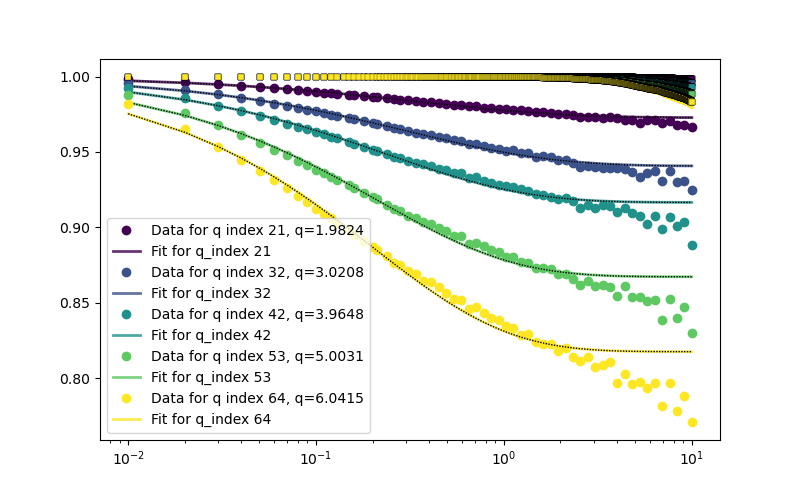

C:\Users\rmcgorty\Anaconda3\lib\site-packages\numpy\ma\core.py:3380: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval
C:\Users\rmcgorty\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\rmcgorty\Anaconda3\lib\site-packages\numpy\ma\core.py:3380: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval
C:\Users\rmcgorty\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\rmcgorty\Anaconda3\lib\site-packages\numpy\ma\core.py:3380: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval
C:\Users\rmcgorty\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex valu

In [219]:
cmap = plt.get_cmap("viridis") 

fig_width = 8
markersize = 6 #was 1
fig, ax = plt.subplots(nrows=1, figsize=(fig_width,fig_width/1.618))
data = 0.2 * (fit03_06_A.isf_data + fit03_06_A1.isf_data + fit03_06_B.isf_data + fit03_06_B1.isf_data + fit03_06_B2.isf_data)
theory = 0.2 * (fit03_06_A.theory + fit03_06_A1.theory + fit03_06_B.theory + fit03_06_B1.theory + fit03_06_B2.theory)
times = fit03_06_A.lagtime
q = fit03_06_A.q    
xlabel_str = "Lag time (s)"
ylabel_str = "ISF"

#q_index_to_plot = np.arange(12,100,7)
q_index_to_plot = np.array([21,32,42,53,64])
clrs = np.linspace(0,1,len(q_index_to_plot))
for i,qv in enumerate([21,32,42,53,64]):
    plt_color = cmap(clrs[i])
    qv = int(qv)

    ax.semilogx(times, data[:,qv], 'o', ms=markersize, color=plt_color, label="Data for q index %i, q=%.4f" % (qv, q[qv]))
    ax.semilogx(times, theory[:,qv], '-', color=plt_color, lw=2, alpha=0.8, label="Fit for q_index %i" % qv)
    ax.semilogx(times, theory[:,qv], color='k', linestyle=(0, (1, 1)), lw=1)
    
    #ax.semilogx(imxA.index, (isf[i,:]*np.conj(isf[i,:]))**1, 's', ms=4, color=plt_color, mec='k', mew=0.2)
    #ax.errorbar(imxA.index, (isf[i,:]*np.conj(isf[i,:]))**1, yerr=isf_stderr[i,:], fmt='none', color=plt_color, lw=1)
    
    ax.semilogx(imxA.index, np.real(isf[i,:]), 's', ms=4, color=plt_color, mec='k', mew=0.2)
    ax.errorbar(imxA.index, np.real(isf[i,:]), yerr=isf_stderr[i,:], fmt='none', color=plt_color, lw=1)

plt.legend()

#plt.semilogx(imxA.index, isf, 'ro')
#plt.errorbar(imxA.index, isf, yerr=isf_stderr, fmt='none', color='r')

## Getting the van Hove distributions

In [96]:
from scipy.optimize import curve_fit

# Gaussian function
def gaus_func(x, a, x0, sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

def gaus_exp_func(x, a, x0, sigma, b, lam):
    return a*np.exp(-(x-x0)**2/(2*sigma**2)) + b*np.exp(-1*abs(x-x0)/lam)

In [150]:
bins = np.arange(-0.3,0.3,0.01)

posX = tA.set_index(['frame','particle'])['x'].unstack()
posY = tA.set_index(['frame','particle'])['y'].unstack()

lagframes = 1

vhX = tp.vanhove(posX, lagframes, ensemble=True, mpp=0.13, bins=bins)
vhY = tp.vanhove(posY, lagframes, ensemble=True, mpp=0.13, bins=bins)

prob10 = 0.5*(vhX+vhY)

popt10, pcovR = curve_fit(gaus_func, bins[:-1], prob10, p0=[10,0,0.1])
popt10E, pcovRE = curve_fit(gaus_exp_func, bins[:-1], prob10, p0=[2,0,0.05,0.1,0.1])

In [151]:
popt10E

array([ 4.85925276, -0.00892445,  0.02188258,  5.3516547 ,  0.02714779])

<IPython.core.display.Javascript object>


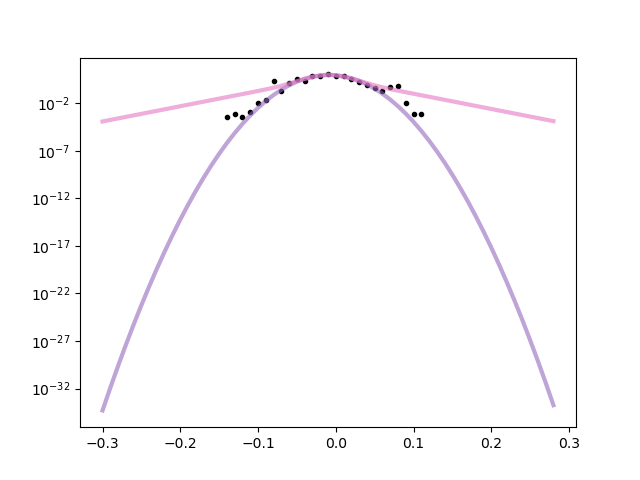

In [152]:
plt.figure()
#plt.semilogy(vhX.index, vhX, 'ro')
#plt.semilogy(vhX.index, vhY, 'bo')
#plt.semilogy(vhX.index, 0.5*(vhX+vhY), 'go')
plt.semilogy(bins[:-1], 0.5*(vhX+vhY), 'k.')

plt.plot(bins[:-1], gaus_func(bins[:-1], popt10[0], popt10[1], popt10[2]), '-', lw=3, alpha=0.6, c='tab:purple')
plt.plot(bins[:-1], gaus_exp_func(bins[:-1], popt10E[0], popt10E[1], popt10E[2], popt10E[3], popt10E[4]), '-', lw=3, alpha=0.6, c='tab:pink')

<IPython.core.display.Javascript object>


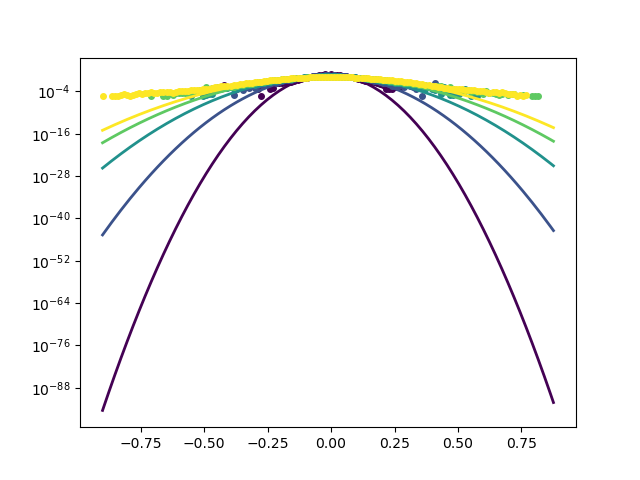

0


C:\Users\rmcgorty\Anaconda3\lib\site-packages\numpy\lib\histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


1
2
3
4


In [172]:
bins = np.arange(-0.9,0.9,0.012)
cmap = plt.get_cmap("viridis")
lag_times_in_frames = np.array([2,6,24,120,600])
clrs = np.linspace(0,1,len(lag_times_in_frames))
probs = np.zeros((len(lag_times_in_frames), len(bins)-1))
gauss_fit = np.zeros_like(probs)
gauss_width = np.zeros_like(lag_times_in_frames)
plt.figure()
for i,lagframes in enumerate(lag_times_in_frames):
    print(i)
    
    posXA = tA.set_index(['frame','particle'])['x'].unstack()
    posYA = tA.set_index(['frame','particle'])['y'].unstack()
    vhXA = tp.vanhove(posXA, int(lagframes), ensemble=True, mpp=0.13, bins=bins)
    vhYA = tp.vanhove(posYA, int(lagframes), ensemble=True, mpp=0.13, bins=bins)
    
    posXA1 = tA1.set_index(['frame','particle'])['x'].unstack()
    posYA1 = tA1.set_index(['frame','particle'])['y'].unstack()
    vhXA1 = tp.vanhove(posXA1, int(lagframes), ensemble=True, mpp=0.13, bins=bins)
    vhYA1 = tp.vanhove(posYA1, int(lagframes), ensemble=True, mpp=0.13, bins=bins)
    

    posXB = tB.set_index(['frame','particle'])['x'].unstack()
    posYB = tB.set_index(['frame','particle'])['y'].unstack()
    vhXB = tp.vanhove(posXB, int(lagframes), ensemble=True, mpp=0.13, bins=bins)
    vhYB = tp.vanhove(posYB, int(lagframes), ensemble=True, mpp=0.13, bins=bins)
    
    posXB1 = tB1.set_index(['frame','particle'])['x'].unstack()
    posYB1 = tB1.set_index(['frame','particle'])['y'].unstack()
    vhXB1 = tp.vanhove(posXB1, int(lagframes), ensemble=True, mpp=0.13, bins=bins)
    vhYB1 = tp.vanhove(posYB1, int(lagframes), ensemble=True, mpp=0.13, bins=bins)
    
    posXB2 = tB2.set_index(['frame','particle'])['x'].unstack()
    posYB2 = tB2.set_index(['frame','particle'])['y'].unstack()
    vhXB2 = tp.vanhove(posXB2, int(lagframes), ensemble=True, mpp=0.13, bins=bins)
    vhYB2 = tp.vanhove(posYB2, int(lagframes), ensemble=True, mpp=0.13, bins=bins)

    probs[i] = (1./10)*(vhXA.values+vhYA.values+vhXA1.values+vhYA1.values+vhXB.values+vhYB.values+vhXB1.values+vhYB1.values+vhYB.values+vhXB2.values+vhYB2.values)
        
    popt, pcovR = curve_fit(gaus_func, bins[:-1], probs[i], p0=[2,0,0.1])
    gauss_fit[i] = gaus_func(bins[:-1], popt[0], popt[1], popt[2])
    gauss_width[i] = popt[2]
    
    
    #popt10, pcovR = curve_fit(gaus_func, bins[:-1], prob10)
    #popt10E, pcovRE = curve_fit(gaus_exp_func, bins[:-1], prob10, p0=[2,0,0.1,1,0.1])
    
    #plt.semilogy(bins[:-1], 0.5*(vhX+vhY), 'o', ms=4, color=cmap(clrs[i])
    
for i,lagframes in enumerate(lag_times_in_frames):
    plt_color = cmap(clrs[i])
    plt.semilogy(bins[:-1], probs[i], 'o', ms=4, color=plt_color)
    plt.plot(bins[:-1], gauss_fit[i], '-', lw=2, color=plt_color)

<IPython.core.display.Javascript object>


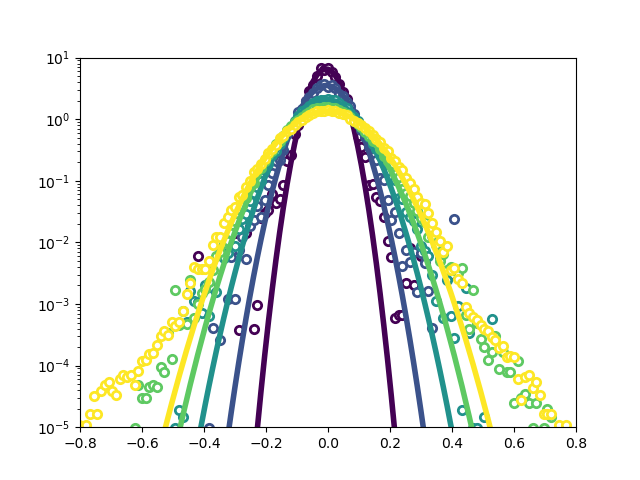

(1e-05, 10)

In [173]:
plt.figure()
for i,lagframes in enumerate(lag_times_in_frames):
    plt_color = cmap(clrs[i])
    plt.semilogy(bins[:-1], probs[i], 'o', ms=6, mec=plt_color, mfc='w', mew=2)
    plt.plot(bins[:-1], gauss_fit[i], '-', lw=4, color=plt_color)
    
plt.xlim(-0.8,0.8)
plt.ylim(1e-5,10)

<IPython.core.display.Javascript object>


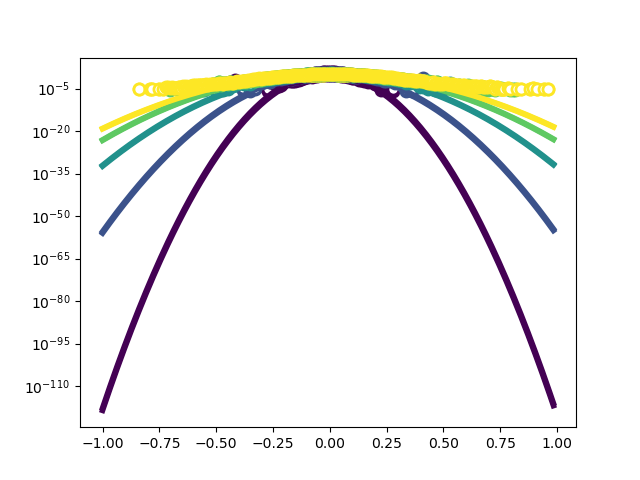

In [162]:
plt.figure()
for i,lagframes in enumerate(lag_times_in_frames):
    plt_color = cmap(clrs[i])
    plt.semilogy(bins[:-1], probs[i]/probs[i].max(), 'o', ms=8, mec=plt_color, mfc='w', mew=2)
    plt.plot(bins[:-1], gauss_fit[i]/gauss_fit[i].max(), '-', lw=4, color=plt_color)